In [1]:
import tensorflow as tf
# from tensorflow.keras.layers import Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt
import visualkeras
import cv2
import os
import time
import numpy as np
import copy
from cityscapesscripts.helpers.labels import labels
from utils import *
from unet import build_model
import pickle
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [2]:
model_name = 'resnet34_8'

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
try:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
except RuntimeError as e:
    print(e)

In [4]:
with open(os.path.join('pickle', 'val_x'), 'rb') as file:
    val_x = pickle.load(file)
    file.close()
    print('Val X loaded')
with open(os.path.join('pickle', 'val_y'), 'rb') as file:
    val_y = pickle.load(file)
    file.close()
    print('Val Y loaded')

Val X loaded
Val Y loaded


In [4]:
mirrored_strategy = tf.distribute.MirroredStrategy()

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1')


In [5]:
model = tf.keras.models.load_model(os.path.join('trainings', 'models', model_name))

In [6]:
images_test = model.predict(val_x)
print(images_test.shape)
images_test = np.argmax(images_test, axis=3)
print(images_test.shape)

(500, 256, 256, 8)
(500, 256, 256)


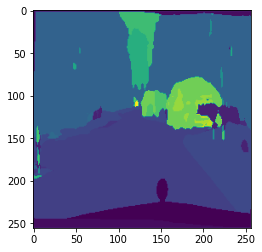

In [81]:
plt.imshow(images_test[0])

In [6]:
ids = []
colors = []
for i in range(len(labels)):
    ids.append(labels[i].id)
    colors.append(labels[i].color)

In [ ]:
images_test_color = id2image(images_test, ids, colors)

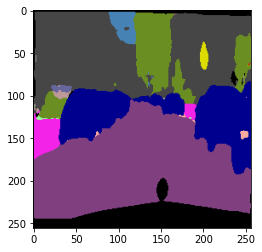

In [84]:
plt.imshow(images_test_color[1])

In [33]:
labels[0].color

(0, 0, 0)

In [21]:
'{:0>5}'.format(7) + '.jpg'

'00007.jpg'

In [86]:
i = 0
path = os.path.join('videos', 'output')
for each_image in images_test_color:
    i += 1
    r, g, b = cv2.split(each_image)
    each_image[:,:,0] = b
    each_image[:,:,1] = g
    each_image[:,:,2] = r
    img = np.array(each_image, dtype='uint8')
    img = cv2.resize(img, (1920, 1080))
    cv2.imwrite(os.path.join(path, '{:0>5}'.format(i) + '.jpg'), img)

In [57]:
images_test_color[0, 25, 25]

array([70, 70, 70])

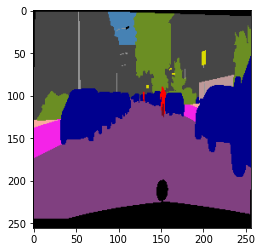

In [75]:
val_y_color = id2image(val_y, ids, colors)

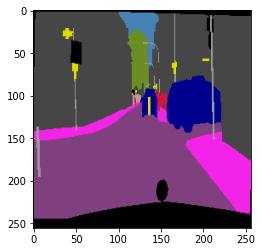

In [77]:
plt.imshow(val_y_color[0])

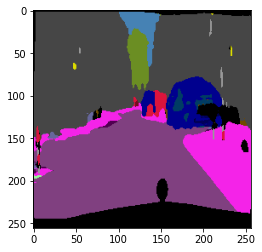

In [78]:
plt.imshow(images_test_color[0])

In [32]:
toyo_images = np.array(load_images(os.path.join('videos', 'video1'), (256, 256)))

In [56]:
toyo_images_pred = model.predict(toyo_images[701:], batch_size=8)

In [57]:
toyo_images_pred = np.argmax(toyo_images_pred, axis=3)

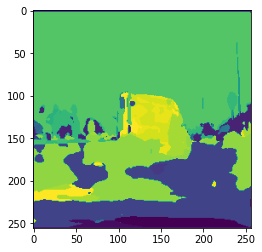

In [58]:
plt.imshow(toyo_images_pred[0])

In [59]:
toyo_images_color = id2image(toyo_images_pred, ids, colors)

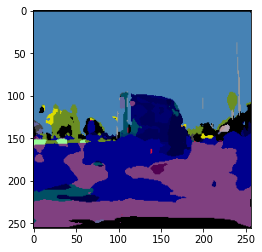

In [61]:
plt.imshow(toyo_images_color[0])

In [62]:
i = 700
path = os.path.join('videos', 'output_toyo')
for each_image in toyo_images_color:
    i += 1
    r, g, b = cv2.split(each_image)
    each_image[:,:,0] = b
    each_image[:,:,1] = g
    each_image[:,:,2] = r
    img = np.array(each_image, dtype='uint8')
    img = cv2.resize(img, (1920, 1080))
    cv2.imwrite(os.path.join(path, '{:0>5}'.format(i) + '.jpg'), img)

In [8]:
np.array(range(8))

array([0, 1, 2, 3, 4, 5, 6, 7])